# Computação Natural - Tarefa Computacional 2

## Alexandre Rosseto Lemos
### PPGI (Mestrado)

### Objetivo
Treinamento de uma rede neural feedforward usando o
algoritmo GA e PSO para classificação para os dados da Iris, wine, e breast cancer.

# Inicialização

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from numpy.random import randint, rand
import random
import time

# Datasets
from sklearn.datasets import load_breast_cancer, load_wine, load_iris

## Funções e Classes

### data_to_df

In [2]:
def data_to_df(data):
    '''
    Info:
        Essa função lê os dados e transforma eles em um dataframe.
    ----------
    Input:
        data: Dados obtidos através da bibliteca sklearn.datasets.
    ----------
    Output:
        df: Dataframe com os dados
    '''
    # Obtendo as features e target
    feat = data.data
    target = data.target
    target = target.reshape(len(target), 1)
    
    # Concatenando as informacoes
    info = np.hstack((feat, target))
    
    # Obtendo os nomes das features e adiciona o nome da coluna target
    feat_name = list(data.feature_names)
    feat_name.append('target')
    
    # Criando o dataframe
    df = pd.DataFrame(data = info, columns = feat_name)
    
    display(df.head())
    print('Shape:',df.shape)
    
    return df

### data_prep

In [3]:
def data_prep(df):
    '''
    Info:
        Funcao que prepara os dados para serem utilizados pelos modelos
    ----------
    Input:
        df: DataFrame utilizado
    ----------
    Output:
        X_train_norm: Dados de treinamento normalizados
        y_train: Labels de treinamento
        X_test_norm: Dados de teste normalizaods
        y_test: Labels de teste
    '''
    # Separando as features dos labels
    X = df.drop(columns = 'target')
    y = df['target']

    # Separando os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

    # Normalizando utilizando os dados de treino
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    return X_train_norm, y_train, X_test_norm, y_test

### exec_n_vezes_psomlp

In [4]:
def exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w, qtd_particulas, tam_rede, X_train, X_test, y_train, y_test):
    '''
    Info:
        Funcao que executa o algoritmo psomlp n vezes e retorna a fitness media e o tempo de execucao das n execucoes.
    ----------
    Input:
        n: Numero de execucoes do algoritmo
        n_iter: Numero de iteracoes do algoritmo
        w_min, w_max, w: Parametros do PSO
        qtd_particulas: Quantidade de particulas geradas
        tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
        X_train, y_train: Dados e labels de treinamento
        X_test, y_test: Dados e labels de teste
    ----------
    Output:
        avg_fit: Fitness media das n execucoes do algoritmo
        exec_time: Tempo de execucao das n execucoes do algoritmo
        avg_num_converg: Numero medio de iteracoes ate convergencia
    '''
    # Executando o algoritmo n vezes para o dataset wine
    fitness = []

    num_converg = []
    # Calculando o tempo de execucao
    start_time = time.time()
    for i in range(n):

        # Inicianlizando o objeto
        pso_mlp = PSOMLP(w, w_min, w_max, X_train, X_test, y_train, y_test, n_iter)

        # Executando o algoritmo
        pso_mlp.run(tam_rede, qtd_particulas)

        fitness.append(pso_mlp.hist)
        
        num_converg.append(pso_mlp.n_iter_converg)

    # Obtendo o maximo fitness para cada iteracao
    max_fit = []
    for f in fitness:
        max_fit.append(max(f))

    # Obtendo a media dos resultados
    avg_fit = np.mean(max_fit)
    exec_time = time.time() - start_time
    
    # Obtendo a media de iteracoes ate a convergencia
    avg_num_converg = np.mean(num_converg)
        
    return avg_fit, exec_time, avg_num_converg

### exec_n_vezes_mlpga

In [5]:
def exec_n_vezes_mlpga(n, n_iter, qtd_individuos, tam_rede, cross_rate, mutation_rate,mutation_limits, X_train, X_test, y_train, y_test):
    '''
    Info:
        Funcao que executa o algoritmo mlpga n vezes e retorna a fitness media e o tempo de execucao das n execucoes.
    ----------
    Input:
        n: Numero de execucoes do algoritmo
        n_iter: Numero de iteracoes do algoritmo
        cross_rate: Taxa de crossover
        mutation_rate: Taxa de mutacao
        qtd_individuos: Quantidade de individuos na populacao
        tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
        X_train, y_train: Dados e labels de treinamento
        X_test, y_test: Dados e labels de teste
    ----------
    Output:
        avg_fit: Fitness media das n execucoes do algoritmo
        exec_time: Tempo de execucao das n execucoes do algoritmo      
        avg_num_converg: Numero medio de iteracoes ate convergencia
    '''
    
    # Executando o algoritmo n vezes para o dataset wine
    fitness = []

    num_converg = []
    # Calculando o tempo de execucao
    start_time = time.time()
    for i in range(n):

        # Inicianlizando o objeto
        mlp_ga = MLPGA(cross_rate, mutation_rate, mutation_limits, X_train_wine, X_test_wine, y_train_wine, 
                       y_test_wine, n_iter, verbose = False)

        # Executando o algoritmo
        mlp_ga.run(tam_rede, qtd_individuos)

        fitness.append(mlp_ga.hist)
        
        num_converg.append(mlp_ga.n_iter_converg)

    # Obtendo o maximo fitness para cada iteracao
    max_fit = []
    for f in fitness:
        max_fit.append(max(f))

    # Obtendo a media dos resultados
    avg_fit = np.mean(max_fit)
    exec_time = time.time() - start_time
    
    # Obtendo a media de iteracoes ate a convergencia
    avg_num_converg = np.mean(num_converg)
    
    return avg_fit, exec_time, avg_num_converg

### executa_n_baseline

In [6]:
def executa_n_baseline(n, tam_rede, n_iter, X_train, y_train, X_test, y_test):
    '''
    Info:
        Funcao que executa o algoritmo baseline n vezes e retorna a fitness media, o tempo de execucao das n execucoes 
        e a quantidade de execuções até a convergência.
    ----------
    Input:
        n: Numero de execucoes do algoritmo
        tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
        n_iter: Numero de iteracoes do algoritmo
        X_train, y_train: Dados e labels de treinamento
        X_test, y_test: Dados e labels de teste
    ----------
    Output:
        fit_base_avg: Fitness media das n execucoes do modelo baseline
        base_exec_time: Tempo de execucao das n execucoes do algoritmo baseline
        avg_num_converg_base: Numero medio de iteracoes ate convergencia do modelo baseline
    '''
    # Rodando o modelo baseline(mlp da biblioteca sklearn)
    fit_baseline = []
    num_converg_base = []
    
    # Calculando o tempo de execucao
    start_time_base = time.time()
    for i in range(n):
        
        # Gera o modelo baseline
        mlp_base = MLPClassifier(hidden_layer_sizes = tam_rede, max_iter = n_iter)
        
        # Treina o modelo
        mlp_base.fit(X_train, y_train)
        
        # Realiza a predicao
        predictions = mlp_base.predict(X_test)
        
        # Calcula a fitness e salva numa lista
        fit_baseline.append(accuracy_score(y_test, predictions))
        
        num_converg_base.append(mlp_base.n_iter_)
        
    # Obtendo a fitness media e o tempo de execucao
    fit_base_avg = np.mean(fit_baseline)
    base_exec_time = time.time() - start_time_base
    
    # Obtendo a media de iteracoes ate a convergencia
    avg_num_converg_base = np.mean(num_converg_base)
    
    return fit_base_avg, base_exec_time, avg_num_converg_base

### PSOMLP

In [7]:
class PSOMLP():
    
    def __init__(self, w, w_min, w_max, X_train, X_test, y_train, y_test, max_iter, verbose = False):
        self.particulas = []
        self.w = w
        self.pbest = []
        self.w_max = w_max
        self.w_min = w_min
        self.max_iter = max_iter
        self.reduz_w = None
        self.pbest = []
        self.pbest_fitness = []
        self.gbest = []
        self.gbest_fitness = None
        self.current_fitness = []
        self.velocidade = []
        self.mlp = None
        self.pesos_shape = []
        self.vies_shape = []
        self.n_pesos = 0
        self.vies = []
        self.n_vies = 0
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.hist = []
        self.verbose = verbose
        self.n_iter_converg = 0
        
    def inicializa_particulas(self, tam_rede, qtd_particulas):
        '''
        Info:
            Funcao que inicializa uma quantidade de particulas com todos os pesos da rede como um vetor
        ----------
        Input:
            tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
            qtd_particulas: Quantidade de particulas geradas
        ----------
        Output:
            None
        '''
        for qtd in range(qtd_particulas):
            # Inicializando o modelo
            mlp = MLPClassifier(hidden_layer_sizes = tam_rede, max_iter = 1)
            mlp.fit(self.X_train, self.y_train)

            # Inicializando a particula (pesos da rede)
            particula = []

            # Pesos das camadas ocultas da rede (incluindo a de saida)
            for w in mlp.coefs_:
                for w_ in w.ravel():
                    particula.append(w_)
                
            # Pesos dos vieses da rede (incluindo da camada de saida)
            for b in mlp.intercepts_:
                for b_ in b.ravel():
                    particula.append(b_)

            self.particulas.append(particula)
            
            # Inicializando parametros das particulas
            self.current_fitness.append(-1)
            self.pbest.append([-1])
            self.pbest_fitness.append(-1)
            self.velocidade.append(-1)
            
    def inicializa_mlp(self, tam_rede):
        '''
        Info:
            Funcao que inicializa a estrutura de pesos da rede utilizada pela classe
        ----------
        Input:
            tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
        ----------
        Output:
            None
        '''
        # Inicializando o modelo
        self.mlp = MLPClassifier(hidden_layer_sizes = tam_rede, max_iter = 1,  warm_start = True)
        
        # Inicializando os pesos
        self.mlp.fit(self.X_train, self.y_train)
        for w in self.mlp.coefs_:
                self.pesos_shape.append(w.shape)
                
        for b in self.mlp.intercepts_:
                self.vies_shape.append(b.shape)        

        # Salvando o formato dos pesos
        self.pesos_total_shape = self.pesos_shape + self.vies_shape        
        self.n_pesos = len(self.mlp.coefs_)
        self.n_vies = len(self.mlp.intercepts_)
        
    def fitness(self, particula, p_ind):
        '''
        Info:
            Funcao que calcula a acuracia de cada particula
        ----------
        Input:
            particula: Particula a ser testada
            p_ind: Indice da particula na lista de particulas
        ----------
        Output:
            None
        '''
        # Obtendo os pesos da rede presente na particula
        # Lista com os pontos que separam cada peso na particula
        splits = []
        aux = 0
        for p in self.pesos_total_shape:
            try:
                aux = aux + p[0]*p[1]
                splits.append(aux)
            except:
                aux = aux + p[0]
                splits.append(aux)
        
        # Remove o ultimo ponto de separacao
        splits.pop()
        
        # Separando a particula
        pesos_vies = np.split(particula, splits)
        
        # Obtendo os pesos (w) e vieses (b)
        w = pesos_vies[0:self.n_pesos]
        b = pesos_vies[self.n_pesos:]
        
        # Alterando o formato para se igualar ao da rede neural
        for i in range(len(w)):
            w[i] = np.reshape(w[i], self.pesos_shape[i])
            
        for j in range(len(b)):
            b[j] = np.reshape(b[j], self.vies_shape[j])
        
        # Utilizando os pesos na rede
        self.mlp.coefs_ = w
        self.mlp.intercepts_ = b
        
        # Fazendo a predicao com os pesos
        y_pred = self.mlp.predict(self.X_test)
        
        # Calculando a acuracia
        acc = accuracy_score(self.y_test, y_pred)
        
        # Salvando a acuracia na lista de fitness atual das particulas
        self.current_fitness[p_ind] = acc
        
        # Atualizando o pbest da particula
        # Primeira execucao
        if len(self.pbest[p_ind]) == 1:
            self.pbest[p_ind] = particula
            self.pbest_fitness[p_ind] = acc

        # Nao e a primeira execucao
        else:
            # Verifica se a fitness atual e superior a fitness do pbest
            if acc > self.pbest_fitness[p_ind]:
                # Caso seja, atualiza o pbest da particula
                self.pbest_fitness[p_ind] = acc
                self.pbest[p_ind] = particula
            else:
                # Caso nao seja, nao faz nada
                pass
        
    def atualiza_gbest(self):
        '''
        Info:
            Funcao que atualiza o gbest do modelo
        ----------
        Input:
            None
        ----------
        Output:
            None
        '''
        # Obtem o melhor pbest dentre as particulas
        best_pbest_fitness = max(self.pbest_fitness)
        best_pbest_ind = self.pbest_fitness.index(best_pbest_fitness)
        best_pbest = self.pbest[best_pbest_ind]
        
        # Verifica se ja existe um gbest
        if len(self.gbest) == 0:
            self.gbest = best_pbest
            self.gbest_fitness = best_pbest_fitness            
            
        else:
            # Verifica se existe um pbest melhor que o gbest atual
            if best_pbest_fitness > self.gbest_fitness:
                # Caso exista, atualiza o gbest
                self.gbest = best_pbest
                self.gbest_fitness = best_pbest_fitness
            else:
                # Caso nao exista, nao ocorre nada
                pass
            
    def atualiza_particulas(self, particula, p_ind):
        '''
        Info:
            Funcao que atualiza as particulas
        ----------
        Input:
            None
        ----------
        Output:
            None
        '''
        # Inicializando parametros
        c1, c2 = 2.0, 2.0
        
        # Gerando as variáveis aleatórias
        r1, r2 =  0.729, 0.729
        #r2 = np.random.random_sample()
        
        # Calculando a velocidade da particula
        self.velocidade[p_ind] = ((self.w * self.velocidade[p_ind])  + 
                                 (c1 * r1 * (np.array(self.pbest[p_ind]) - np.array(particula))) +
                                 (c2 * r2 * (np.array(self.gbest) - np.array(particula)))
                                 )
        
        # Atualizando a particula
        self.particulas[p_ind] = particula + self.velocidade[p_ind]
    
    def run(self, tam_rede, qtd_particulas):
        '''
        Info:
            Funcao de execucao do modelo PSO-MLP
        ----------
        Input:
            tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
            qtd_particulas: Quantidade de particulas geradas no modelo
        ----------
        Output:
            None
        '''
        flag_converge = 0
        
        if self.verbose:        
            print('Inicializando as particulas')
        # Inicializa as particulas
        self.inicializa_particulas(tam_rede, qtd_particulas)
        
        if self.verbose:
            print('Inicializando a rede neural')
        # Inicializa a rede neural
        self.inicializa_mlp(tam_rede)
        
        # Calculando o fator de reducao do w
        self.reduz_w = np.linspace(self.w_max, self.w_min, num = self.max_iter, retstep = True)[1]
        
        # Inicializando a velocidade para cada particula
        for i in range(len(self.particulas)):
            self.velocidade[i] = np.array([0] * len(self.particulas[0]))
        
        for i in range(self.max_iter):
            if self.verbose:
                print(f'###-----Execucao {i+1}-----###')
                print('Calculando a fitness das particulas')
            
            for p_ind, p in enumerate(self.particulas):
                # Calcula a fitness
                self.fitness(p, p_ind)
        
            if self.verbose:
                print('Atualizando o gbest')
            # Atualiza o gbest
            self.atualiza_gbest()
            
            # Armazenando o gbest de cada iteracao
            self.hist.append(self.gbest_fitness)
            
            # Verifica convergencia a partir da segunda execucao
            if i > 0:
                if self.gbest_fitness == self.hist[-2]:
                    flag_converge = flag_converge + 1
                    
                if flag_converge == 10:
                    self.n_iter_converg = i - 9
            
            if self.verbose:
                print('Atualizando as particulas')
            for p_ind, p in enumerate(self.particulas):
                # Atualiza particulas
                self.atualiza_particulas(p, p_ind)
                
            # Diminuindo o valor de w
            self.w = self.w - self.reduz_w

### MLPGA

In [8]:
class MLPGA():
    
    def __init__(self, cross_rate, mutat_rate, mutation_limits, X_train, X_test, y_train, y_test, max_iter, verbose = False):
        self.populacao = []
        self.pais = []
        self.filhos = []
        self.lim_sup_mut = mutation_limits[1]
        self.lim_inf_mut = mutation_limits[0]
        self.max_iter = max_iter
        self.cross_rate = cross_rate
        self.mutation_rate = mutat_rate
        self.current_fitness = []
        self.melhor_individuo = None
        self.melhor_fitness = -100000
        self.mlp = None
        self.pesos_shape = []
        self.vies_shape = []
        self.n_pesos = 0
        self.vies = []
        self.n_vies = 0
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.hist = []
        self.verbose = verbose
        self.n_iter_converg = 0
        
    def inicializa_populacao(self, tam_rede, qtd_individuos):
        '''
        Info:
            Funcao que inicializa uma quantidade de individuos com todos os pesos da rede como um vetor
        ----------
        Input:
            tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
            qtd_individuos: Quantidade de individuos na populacao
        ----------
        Output:
            None
        '''
        for qtd in range(qtd_individuos):
            # Inicializando o modelo
            mlp = MLPClassifier(hidden_layer_sizes = tam_rede, max_iter = 1)
            mlp.fit(self.X_train, self.y_train)

            # Inicializando a particula (pesos da rede)
            individuo = []

            # Pesos das camadas ocultas da rede (incluindo a de saida)
            for w in mlp.coefs_:
                for w_ in w.ravel():
                    individuo.append(w_)
                
            # Pesos dos vieses da rede (incluindo da camada de saida)
            for b in mlp.intercepts_:
                for b_ in b.ravel():
                    individuo.append(b_)

            self.populacao.append(individuo)
            
            # Inicializando parametros dos individuos
            self.current_fitness.append(-1)
                     
    def inicializa_mlp(self, tam_rede):
        '''
        Info:
            Funcao que inicializa a estrutura de pesos da rede utilizada pela classe
        ----------
        Input:
            tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
        ----------
        Output:
            None
        '''
        # Inicializando o modelo
        self.mlp = MLPClassifier(hidden_layer_sizes = tam_rede, max_iter = 1,  warm_start = True)
        
        # Inicializando os pesos
        self.mlp.fit(self.X_train, self.y_train)
        for w in self.mlp.coefs_:
                self.pesos_shape.append(w.shape)
                
        for b in self.mlp.intercepts_:
                self.vies_shape.append(b.shape)        

        # Salvando o formato dos pesos
        self.pesos_total_shape = self.pesos_shape + self.vies_shape        
        self.n_pesos = len(self.mlp.coefs_)
        self.n_vies = len(self.mlp.intercepts_)
        
    def fitness(self, individuo, i_ind):
        '''
        Info:
            Funcao que calcula a acuracia de cada individuo
        ----------
        Input:
            individuo: Individuo a ser testado
            i_ind: Indice do individuo na populacao
        ----------
        Output:
            None
        '''
        # Obtendo os pesos da rede presente na particula
        # Lista com os pontos que separam cada peso na particula
        splits = []
        aux = 0
        for p in self.pesos_total_shape:
            try:
                aux = aux + p[0]*p[1]
                splits.append(aux)
            except:
                aux = aux + p[0]
                splits.append(aux)
        
        # Remove o ultimo ponto de separacao
        splits.pop()
        
        # Separando a particula
        pesos_vies = np.split(individuo, splits)
        
        # Obtendo os pesos (w) e vieses (b)
        w = pesos_vies[0:self.n_pesos]
        b = pesos_vies[self.n_pesos:]
        
        # Alterando o formato para se igualar ao da rede neural
        for i in range(len(w)):
            w[i] = np.reshape(w[i], self.pesos_shape[i])
            
        for j in range(len(b)):
            b[j] = np.reshape(b[j], self.vies_shape[j])
        
        # Utilizando os pesos na rede
        self.mlp.coefs_ = w
        self.mlp.intercepts_ = b
        
        # Fazendo a predicao com os pesos
        y_pred = self.mlp.predict(self.X_test)
        
        # Calculando a acuracia
        acc = accuracy_score(self.y_test, y_pred)
        
        # Salvando a acuracia na lista de fitness atual dos individuos
        self.current_fitness[i_ind] = acc
        
        # Obtendo a melhor acuracia e o melhor filho da geracao
        if acc > self.melhor_fitness:
            self.melhor_fitness = acc
            self.melhor_individuo = individuo
        
    def torneio(self):
        '''
        Info:
            Funcao que realiza a selecao dos pais atraves do metodo de torneio. O torneio e realizado comparando-se
            apenas dois pais por vez (k = 2).
        ----------
        Input:
            None
        ----------
        Output:
            None
        '''
        # Zera a lista de pais
        self.pais = []
        
        # Selecionando a quantidade de pais igual a quantidade de individuos na populacao
        for torneio in range(0, len(self.populacao)):
            
            # Selecionando aleatoriamente 2 pais dentre os individuos da populacao
            indice_p1 = randint(len(self.populacao))
            indice_p2 = randint(len(self.populacao))

            # Verificando qual deles possui a maior fitness
            fit_p1 = self.current_fitness[indice_p1]
            fit_p2 = self.current_fitness[indice_p2]

            # O pai selecionado será aquele cuja fitness é maior
            if fit_p1 > fit_p2:
                self.pais.append(self.populacao[indice_p1])
            else:
                self.pais.append(self.populacao[indice_p2])
                
    def crossover_mutacao(self):
        '''
        Info:
            Funcao que realiza a operacao de crossover e mutacao nos filhos.
        ----------
        Input:
            None
        ----------
        Output:
            None
        '''
        # Zera a lista de filhos
        self.filhos = []
        
        # Cada dupla de pais gera uma dupla de filhos
        for i in range(0, len(self.pais), 2):
            p1 = self.pais[i]
            p2 = self.pais[i + 1]
            
            # Gera dois filhos inicialmente iguais aos pais
            f1, f2 = p1.copy(), p2.copy()
            
            # Verifica se ocorrera o crossover
            if rand() < self.cross_rate:
                
                # Selecionando o ponto de crossover
                cross_point = randint(1, len(p1) - 2)
                
                # Realiza o crossover
                f1 = p1[:cross_point] + p2[cross_point:]
                f2 = p2[:cross_point] + p1[cross_point:]
                
                # Realiza a mutacao
                for filho in [f1, f2]:
                    
                    # Para cada elemento do filho
                    for j in range(len(filho)):
                        
                        # Verifica se ocorrera a mutacao
                        if rand() < self.mutation_rate:
                            
                            # Mutando o j-esimo elemento do filho
                            filho[j] = random.uniform(self.lim_inf_mut, self.lim_sup_mut)
            
            # Pode nao ocorrer crossover, mas ocorrer mutacao
            else:
                
                # Realiza a mutacao
                for filho in [f1, f2]:
                    
                    # Para cada elemento do filho
                    for j in range(len(filho)):
                        
                        # Verifica se ocorrera a mutacao
                        if rand() < self.mutation_rate:
                            
                            # Mutando o j-esimo elemento do filho
                            filho[j] = random.uniform(self.lim_inf_mut, self.lim_sup_mut)
                    
                    self.filhos.append(filho)
                
        # Os filhos se tornam a nova populacao
        self.populacao = self.filhos        
    
    def run(self, tam_rede, qtd_individuos):
        '''
        Info:
            Funcao de execucao do modelo PSO-MLP
        ----------
        Input:
            tam_rede: Tupla com a quantidade de neuronios em cada camada oculta da rede
            qtd_individuos: Quantidade de individuos na populacao
        ----------
        Output:
            None
        '''
        # Flag utilizada para determinar quando o algoritmo convergiu (quando o melhor fitness nao muda em 10 iteracoes)
        flag_converge = 0
        
        if self.verbose:        
            print('Inicializando a populacao')
        # Inicializa as particulas
        self.inicializa_populacao(tam_rede, qtd_individuos)
        
        if self.verbose:
            print('Inicializando a rede neural')
        # Inicializa a rede neural
        self.inicializa_mlp(tam_rede)
        
        for i in range(self.max_iter):
            if self.verbose:
                print(f'###-----Execucao {i+1}-----###')
                print('Calculando a fitness da populacao')
            
            for i_ind, individuo in enumerate(self.populacao):
                
                # Calcula a fitness
                self.fitness(individuo, i_ind)
                
            # Armazenando a melhor fitness de cada geracao
            self.hist.append(self.melhor_fitness)
            
            # Verifica convergencia a partir da segunda execucao
            if i > 0:
                if self.melhor_fitness == self.hist[-2]:
                    flag_converge = flag_converge + 1
                    
                if flag_converge == 10:
                    self.n_iter_converg = i - 9
                
            if self.verbose:
                print('Iniciando o torneio')
            # Realizando o torneio
            self.torneio()
            
            if self.verbose:
                print('Gerando os filhos')
                
            self.crossover_mutacao()

## Carregando os dados

In [9]:
# Obtendo os dados de wine
data_wine = load_wine()
df_wine = data_to_df(data_wine)
print('\nDistribuição das classes')
print(df_wine['target'].value_counts())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Shape: (178, 14)

Distribuição das classes
1.0    71
0.0    59
2.0    48
Name: target, dtype: int64


In [10]:
# Obtendo os dados de breast cancer
data_wdbc = load_breast_cancer()
df_wdbd = data_to_df(data_wdbc)
print('\nDistribuição das classes')
print(df_wdbd['target'].value_counts())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Shape: (569, 31)

Distribuição das classes
1.0    357
0.0    212
Name: target, dtype: int64


In [11]:
# Obtendo os dados de iris
data_iris = load_iris()
df_iris = data_to_df(data_iris)
print('\nDistribuição das classes')
print(df_iris['target'].value_counts())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Shape: (150, 5)

Distribuição das classes
2.0    50
1.0    50
0.0    50
Name: target, dtype: int64


# Preparando os dados

In [12]:
# Para o dataset wine
X_train_wine, y_train_wine, X_test_wine, y_test_wine = data_prep(df_wine)

# Para o dataset wdbd
X_train_wdbd, y_train_wdbd, X_test_wdbd, y_test_wdbd = data_prep(df_wdbd)

# Para o dataset iris
X_train_iris, y_train_iris, X_test_iris, y_test_iris = data_prep(df_iris)

# Execução dos algoritmos
- Devido à natureza aleatório da inicialização dos pesos, o algoritmo será executado 15 vezes para cada conjunto de dados, e a média da acurácia final será calculada.

- A estrutura da rede será alterada para efeito de comparação.

- Os resultados serão comparados com os obtidos utilizando a biblioteca do sklearn com backpropagation


# MLP com PSO

## Analisando a quantidade de neurônios na camada intermediária

### Algoritmo com apenas uma camada intermediária com 10 neurônios


fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.907407       20.471066            6.333333
             wdbd     0.956725       23.565971            6.533333
             iris     0.939259       19.816867            4.466667
baseline     wine     0.801235        0.472000          100.000000
             wdbd     0.926316        0.915097          100.000000
             iris     0.637037        0.431000          100.000000

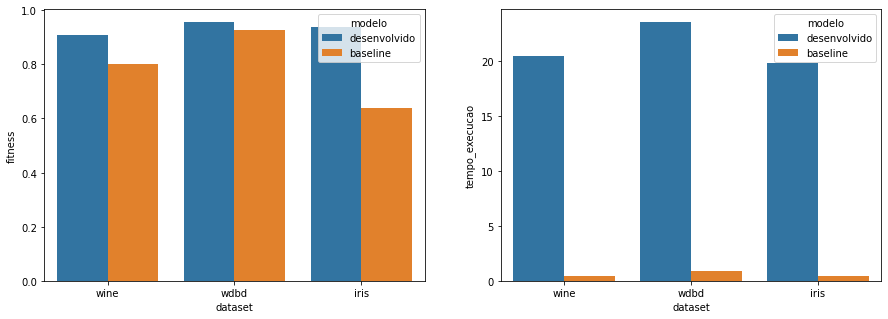

In [13]:
# Parametros do PSO
w_min, w_max = 0.2, 0.6
w = w_max
qtd_particulas = 50   # Quantidade de particulas geradas
n_iter = 100          # Quantidade de iteracoes

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (10)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wine, X_test_wine, y_train_wine, y_test_wine)
base_fitness_wine, base_exec_time_wine, avg_num_converg_base_wine = executa_n_baseline(n, tam_rede, n_iter, X_train_wine, y_train_wine, X_test_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wdbd, X_test_wdbd, y_train_wdbd, y_test_wdbd)
base_fitness_wdbd, base_exec_time_wdbd, avg_num_converg_base_wdbd = executa_n_baseline(n, tam_rede, n_iter, X_train_wdbd, y_train_wdbd, X_test_wdbd, y_test_wdbd)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_iris, X_test_iris, y_train_iris, y_test_iris)
base_fitness_iris, base_exec_time_iris, avg_num_converg_base_iris = executa_n_baseline(n, tam_rede, n_iter, X_train_iris, y_train_iris, X_test_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

### Algoritmo com uma camada intermediária com 20 neurônios

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.950617       21.251320            6.600000
             wdbd     0.956335       25.389879            7.133333
             iris     0.906667       20.538162            5.000000
baseline     wine     0.918519        0.505502          100.000000
             wdbd     0.950097        1.037001          100.000000
             iris     0.792593        0.474000          100.000000

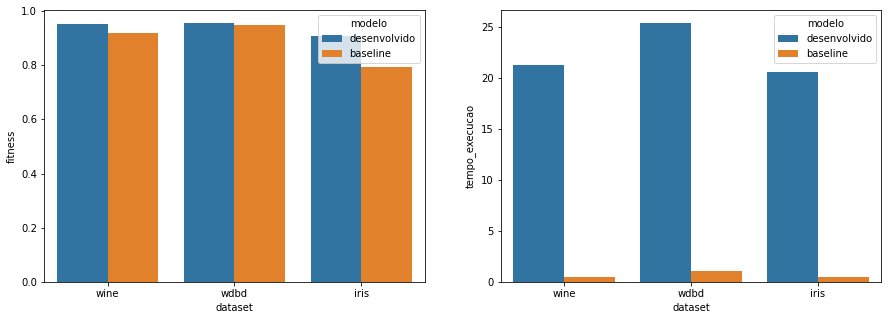

In [15]:
# Parametros do PSO
w_min, w_max = 0.2, 0.6
w = w_max
qtd_particulas = 50   # Quantidade de particulas geradas
n_iter = 100          # Quantidade de iteracoes

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (20)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wine, X_test_wine, y_train_wine, y_test_wine)
base_fitness_wine, base_exec_time_wine, avg_num_converg_base_wine = executa_n_baseline(n, tam_rede, n_iter, X_train_wine, y_train_wine, X_test_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wdbd, X_test_wdbd, y_train_wdbd, y_test_wdbd)
base_fitness_wdbd, base_exec_time_wdbd, avg_num_converg_base_wdbd = executa_n_baseline(n, tam_rede, n_iter, X_train_wdbd, y_train_wdbd, X_test_wdbd, y_test_wdbd)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_iris, X_test_iris, y_train_iris, y_test_iris)
base_fitness_iris, base_exec_time_iris, avg_num_converg_base_iris = executa_n_baseline(n, tam_rede, n_iter, X_train_iris, y_train_iris, X_test_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

### Algoritmo com uma camada intermediária com 50 neurônios

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.941975       24.641784            5.133333
             wdbd     0.961014       34.131490            6.333333
             iris     0.909630       22.917643            4.400000
baseline     wine     0.976543        0.662139          100.000000
             wdbd     0.957505        3.238161          100.000000
             iris     0.840000        0.591453          100.000000

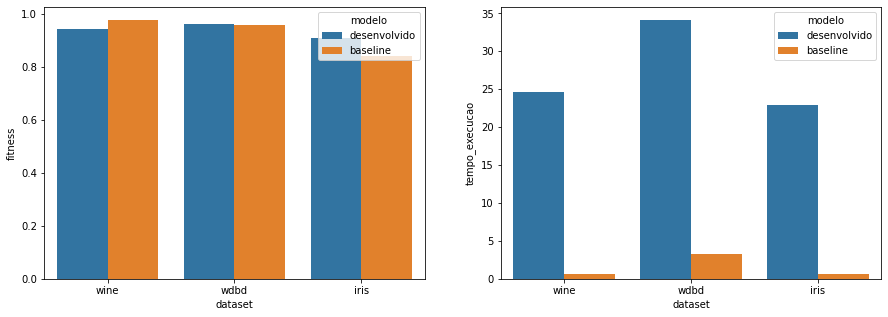

In [17]:
# Parametros do PSO
w_min, w_max = 0.2, 0.6
w = w_max
qtd_particulas = 50   # Quantidade de particulas geradas
n_iter = 100          # Quantidade de iteracoes

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (50)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wine, X_test_wine, y_train_wine, y_test_wine)
base_fitness_wine, base_exec_time_wine, avg_num_converg_base_wine = executa_n_baseline(n, tam_rede, n_iter, X_train_wine, y_train_wine, X_test_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wdbd, X_test_wdbd, y_train_wdbd, y_test_wdbd)
base_fitness_wdbd, base_exec_time_wdbd, avg_num_converg_base_wdbd = executa_n_baseline(n, tam_rede, n_iter, X_train_wdbd, y_train_wdbd, X_test_wdbd, y_test_wdbd)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_iris, X_test_iris, y_train_iris, y_test_iris)
base_fitness_iris, base_exec_time_iris, avg_num_converg_base_iris = executa_n_baseline(n, tam_rede, n_iter, X_train_iris, y_train_iris, X_test_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

## Analisando a quantidade de camadas intermediárias

### Algoritmo com 2 camadas intermediarias com 10 neuronios cada

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.908642       23.442171            6.666667
             wdbd     0.953216       27.952029            6.866667
             iris     0.920000       23.446600            5.333333
baseline     wine     0.855556        0.611999          100.000000
             wdbd     0.936062        1.262618          100.000000
             iris     0.718519        0.616000          100.000000

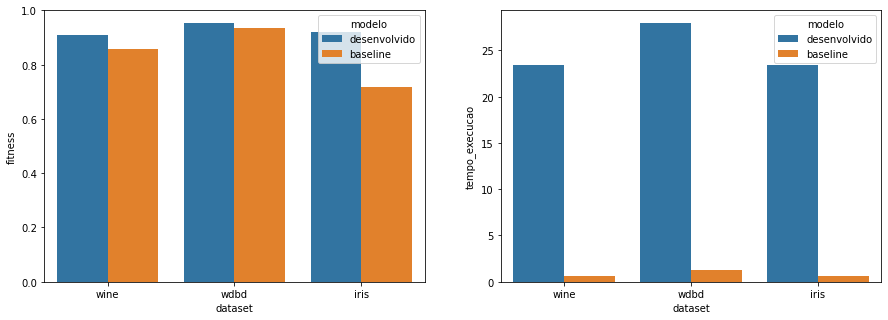

In [19]:
# Parametros do PSO
w_min, w_max = 0.2, 0.6
w = w_max
qtd_particulas = 50   # Quantidade de particulas geradas
n_iter = 100          # Quantidade de iteracoes

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (10, 10)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wine, X_test_wine, y_train_wine, y_test_wine)
base_fitness_wine, base_exec_time_wine, avg_num_converg_base_wine = executa_n_baseline(n, tam_rede, n_iter, X_train_wine, y_train_wine, X_test_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wdbd, X_test_wdbd, y_train_wdbd, y_test_wdbd)
base_fitness_wdbd, base_exec_time_wdbd, avg_num_converg_base_wdbd = executa_n_baseline(n, tam_rede, n_iter, X_train_wdbd, y_train_wdbd, X_test_wdbd, y_test_wdbd)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_iris, X_test_iris, y_train_iris, y_test_iris)
base_fitness_iris, base_exec_time_iris, avg_num_converg_base_iris = executa_n_baseline(n, tam_rede, n_iter, X_train_iris, y_train_iris, X_test_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

### Algoritmo com três camadas intermediárias com 10 neurônios cada

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.907407       26.605162            7.066667
             wdbd     0.939571       32.802013            7.466667
             iris     0.891852       26.744142            4.333333
baseline     wine     0.824691        0.779999          100.000000
             wdbd     0.941910        1.596404          100.000000
             iris     0.757037        0.741674          100.000000

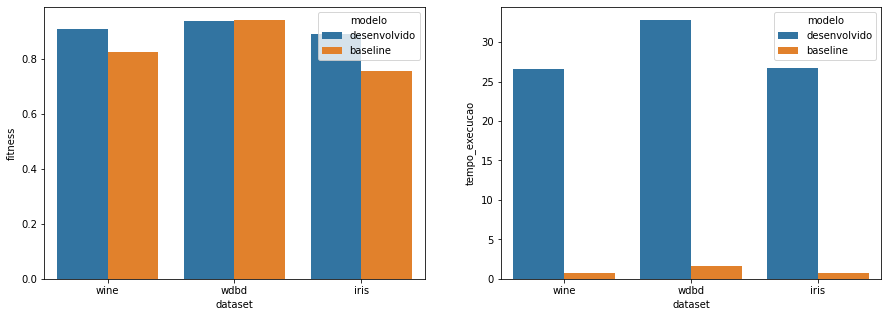

In [21]:
# Parametros do PSO
w_min, w_max = 0.2, 0.6
w = w_max
qtd_particulas = 50   # Quantidade de particulas geradas
n_iter = 100          # Quantidade de iteracoes

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (10, 10, 10)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wine, X_test_wine, y_train_wine, y_test_wine)
base_fitness_wine, base_exec_time_wine, avg_num_converg_base_wine = executa_n_baseline(n, tam_rede, n_iter, X_train_wine, y_train_wine, X_test_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_wdbd, X_test_wdbd, y_train_wdbd, y_test_wdbd)
base_fitness_wdbd, base_exec_time_wdbd, avg_num_converg_base_wdbd = executa_n_baseline(n, tam_rede, n_iter, X_train_wdbd, y_train_wdbd, X_test_wdbd, y_test_wdbd)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_psomlp(n, n_iter, w_min, w_max, w,qtd_particulas, tam_rede, X_train_iris, X_test_iris, y_train_iris, y_test_iris)
base_fitness_iris, base_exec_time_iris, avg_num_converg_base_iris = executa_n_baseline(n, tam_rede, n_iter, X_train_iris, y_train_iris, X_test_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

## MLP com GA

## Analisando a quantidade de neurônios na camada intermediária

### Algoritmo com apenas uma camada intermediária com 10 neurônios

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.791358        4.266797            1.200000
             wdbd     0.767901        4.358063            1.066667
             iris     0.751852        4.303000            1.266667
baseline     wine     0.801235        0.472000          100.000000
             wdbd     0.926316        0.915097          100.000000
             iris     0.637037        0.431000          100.000000

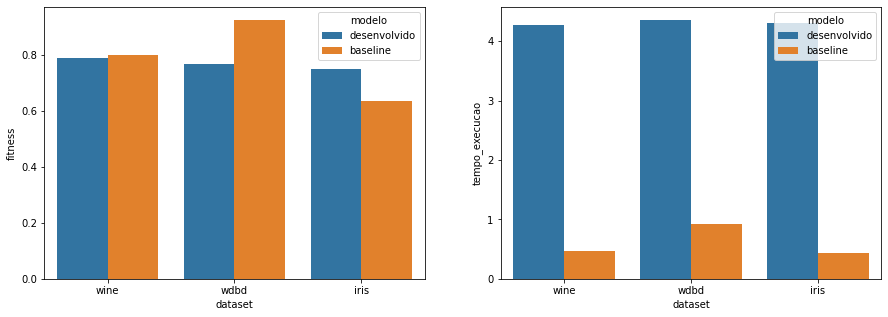

In [14]:
# Parametros do GA
cross_rate = 0.9                # Taxa de crossover
qtd_individuos = 250            # Quantidade de individuos na populacao
n_iter = 20                     # Quantidade de iteracoes
limites_mutacao = [-5.0, 5.0]   # Limites de mutacao
mutat_rate = 0.1                # Taxa de mutacao

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (10)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_iris, X_test_iris, y_train_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

### Algoritmo com apenas uma camada intermediária com 20 neurônios

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.762963        4.839955            1.133333
             wdbd     0.756790        4.734652            1.000000
             iris     0.776543        4.732744            1.133333
baseline     wine     0.918519        0.505502          100.000000
             wdbd     0.950097        1.037001          100.000000
             iris     0.792593        0.474000          100.000000

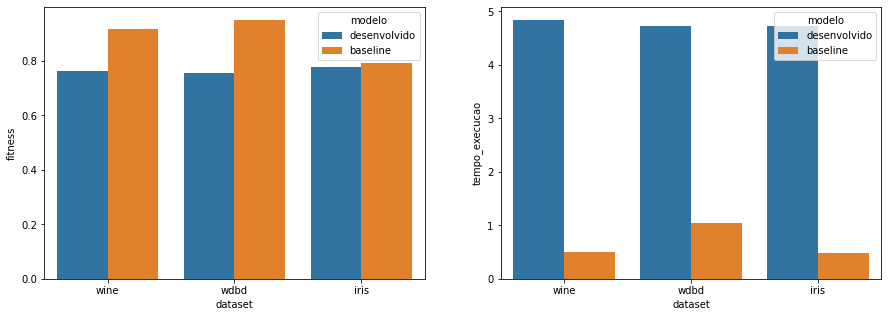

In [16]:
# Parametros do GA
cross_rate = 0.9                # Taxa de crossover
qtd_individuos = 250            # Quantidade de individuos na populacao
n_iter = 20                     # Quantidade de iteracoes
limites_mutacao = [-5.0, 5.0]   # Limites de mutacao
mutat_rate = 0.1                # Taxa de mutacao

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (20)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_iris, X_test_iris, y_train_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

### Algoritmo com apenas uma camada intermediária com 50 neurônios

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.795062        6.444937            1.133333
             wdbd     0.812346        6.436041            1.000000
             iris     0.765432        6.411600            1.066667
baseline     wine     0.976543        0.662139          100.000000
             wdbd     0.957505        3.238161          100.000000
             iris     0.840000        0.591453          100.000000

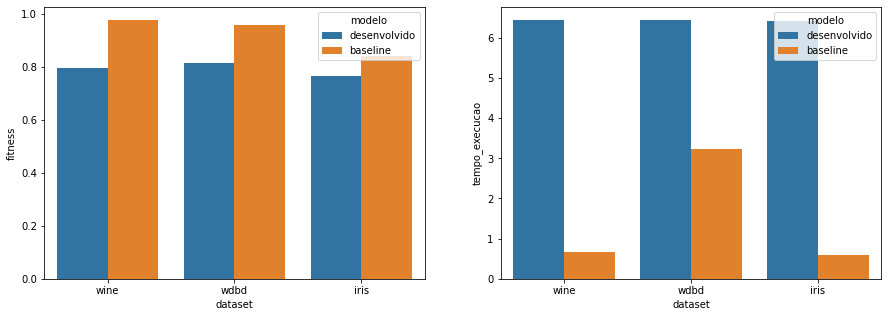

In [18]:
# Parametros do GA
cross_rate = 0.9                # Taxa de crossover
qtd_individuos = 250            # Quantidade de individuos na populacao
n_iter = 20                     # Quantidade de iteracoes
limites_mutacao = [-5.0, 5.0]   # Limites de mutacao
mutat_rate = 0.1                # Taxa de mutacao

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (50)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_iris, X_test_iris, y_train_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

## Analisando a quantidade de camadas intermediárias

### Algoritmo com 2 camadas intermediarias com 10 neuronios cada

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.717284        5.266202            1.200000
             wdbd     0.692593        5.281016            1.133333
             iris     0.700000        5.232893            1.266667
baseline     wine     0.855556        0.611999          100.000000
             wdbd     0.936062        1.262618          100.000000
             iris     0.718519        0.616000          100.000000

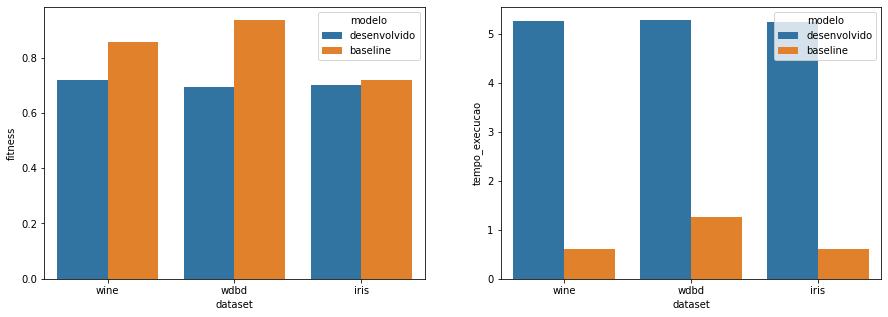

In [20]:
# Parametros do GA
cross_rate = 0.9                # Taxa de crossover
qtd_individuos = 250            # Quantidade de individuos na populacao
n_iter = 20                     # Quantidade de iteracoes
limites_mutacao = [-5.0, 5.0]   # Limites de mutacao
mutat_rate = 0.1                # Taxa de mutacao

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (10, 10)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_iris, X_test_iris, y_train_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');

### Algoritmo com 3 camadas intermediarias com 10 neuronios cada

fitness  tempo_execucao  media_convergencia
modelo       dataset                                              
desenvolvido wine     0.677778        6.203926            1.066667
             wdbd     0.681481        6.154042            1.000000
             iris     0.679012        6.023373            1.000000
baseline     wine     0.824691        0.779999          100.000000
             wdbd     0.941910        1.596404          100.000000
             iris     0.757037        0.741674          100.000000

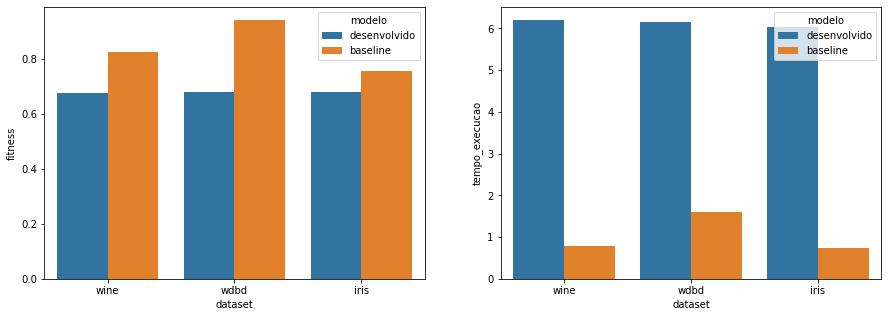

In [22]:
# Parametros do GA
cross_rate = 0.9                # Taxa de crossover
qtd_individuos = 250            # Quantidade de individuos na populacao
n_iter = 20                     # Quantidade de iteracoes
limites_mutacao = [-5.0, 5.0]   # Limites de mutacao
mutat_rate = 0.1                # Taxa de mutacao

# Quantidade de neuronios em cada camada oculta da rede
tam_rede = (10, 10, 10)

# Quantidade de execucoes do algoritmo
n = 15

# Executando o algoritmo para os tres conjunto de dados
# Para o dataset wine
avg_fitness_wine, exec_time_wine, avg_num_converg_wine = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset wdbd
avg_fitness_wdbd, exec_time_wdbd, avg_num_converg_wdbd = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_wine, X_test_wine, y_train_wine, y_test_wine)

# Para o dataset iris
avg_fitness_iris, exec_time_iris, avg_num_converg_iris = exec_n_vezes_mlpga(n, n_iter, qtd_individuos,tam_rede, cross_rate, mutat_rate, limites_mutacao, X_train_iris, X_test_iris, y_train_iris, y_test_iris)

# Salvando os resultados
data = {'fitness': [avg_fitness_wine, avg_fitness_wdbd, avg_fitness_iris, base_fitness_wine, base_fitness_wdbd, base_fitness_iris],
        'modelo': ['desenvolvido', 'desenvolvido', 'desenvolvido', 'baseline', 'baseline', 'baseline'],
        'dataset': ['wine', 'wdbd', 'iris', 'wine', 'wdbd', 'iris'],
        'tempo_execucao': [exec_time_wine, exec_time_wdbd, exec_time_iris, base_exec_time_wine, base_exec_time_wdbd, base_exec_time_iris],
        'media_convergencia': [avg_num_converg_wine, avg_num_converg_wdbd, avg_num_converg_iris, avg_num_converg_base_wine, avg_num_converg_base_wdbd, avg_num_converg_base_iris]}
results = pd.DataFrame(data = data).set_index(['modelo', 'dataset'])
display(results)

# Gerando graficos para comparacao
df_plot = results.reset_index()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.barplot(ax = ax1, data = df_plot, x = 'dataset', y = 'fitness', hue = 'modelo');
sns.barplot(ax = ax2, data = df_plot, x = 'dataset', y = 'tempo_execucao', hue = 'modelo');